**Soru-1: One hot encoding modelin görmediği veriye nasıl uygulanır?**

*Train ve Validation datamızı ayırıp, OneHotEncoding uyguladığımızda farklı sayıda kolon oluşacağı için hata alıyoruz. Bunu önlemek için "handle_unknown=ignore" parametrisini kullanıyoruz. Bu parametre sayesinde bilinmeyen bir kategorik değişken ile karşılaşırsa bu kolonun tüm değerlerini 0 olarak alır. Bu sayede Train ve Validation datamızdaki kolon sayısı eşitlenmiş olur.*

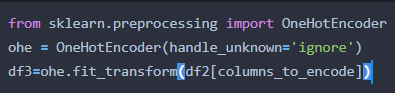

*Train datamıza OneHotEncoder uyguluyoruz. Oluşturduğumuz bu OneHotEncoding objesini validation datamız için de uygulayacağımız için "transform" yapmak yeterli olacaktır.*

**Soru-2: Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)**

In [19]:
import pandas as pd
import numpy as np
dict = {"ülke": ["Türkiye", "Almanya", "İngiltere"],
       "maaş": [5000, 10000, 15000],
       "durum": ["Hayır", "Evet", "Evet"]}
data = pd.DataFrame(dict)
data.head()



,ülke,maaş,durum
0,Türkiye,5000,Hayır
1,Almanya,10000,Evet
2,İngiltere,15000,Evet


*Yukarıdaki gibi bir verimiz olduğunu düşünelim. Modelimizi eğitmek için ülke kolonumuzu sayısal verilere dönüştürmeliyiz. LabelEncoding ile bunu yapabiliriz.*

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data.loc[:,"ülke"] = le.fit_transform(data.loc[:,"ülke"])
data.head()

,ülke,maaş,durum
0,1,5000,Hayır
1,0,10000,Evet
2,2,15000,Evet


*Ülke kolonumuza LabelEncoding uyguladıktan sonra elimizde artık 1 - 0 - 2 değerleri var. Bu değerler sırasıyla "Türkiye - Almanya - İngiltere" değerlerine karşılık gelmektedir. Modelimiz 0 <1 <2 mantığıyla hareket ettiği için nominal verilerde LabelEncoding uygulamak mantıklı değildir.* 

In [92]:
df = pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})
df.head(10)

,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


*Degree değişkenimiz ordinal olduğu için Ordinal Encoding yaparak veriler arasındaki ilişkiyi koruyarak dönüşümü tamamlayabiliriz.*

In [91]:
# !pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding objesi oluşturuyoruz.
# Belirlediğim değerlere göre encoding yapıyorum.
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}}])


df_oe = encoder.fit_transform(df)
print("Öncesi:\n",df)
print("\nSonrası:\n",df_oe)

Öncesi:
         Degree
0  High school
1      Masters
2      Diploma
3    Bachelors
4    Bachelors
5      Masters
6          Phd
7  High school
8  High school

Sonrası:
    Degree
0       1
1       4
2       2
3       3
4       3
5       4
6       5
7       1
8       1


In [93]:
## Alternatif
scale = {'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}
df_v2 = df.copy()
df_v2["Encoding"] = df["Degree"].replace(scale)
df_v2.head(10)

,Degree,Encoding
0,High school,1
1,Masters,4
2,Diploma,2
3,Bachelors,3
4,Bachelors,3
5,Masters,4
6,Phd,5
7,High school,1
8,High school,1


**Soru-3: Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?**

*train_test_split metodunu kullanırken verilerin rastgele dağılması önemlidir. Hem train hem de test veri setinde ana verimizdeki sınıflara ait örnekler normal dağılmalıdır. Aksi takdirde modelimiz gelen verileri öğrendiği sınıfa atamaya müsait olacaktır. Bu durumda "overfitting" meydana gelir. Bunun önüne geçmek için dengesiz verilerimizdeki hedef değişkenlerin sayısını birbirine benzetmek amacıyla "oversampling - undersampling" yapılarak sentetik veri üretilebilir.*

![SMOTE](SMOTE.jpg)

**Soru-4: Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?**

*Validation verileri, görünmeyen verilere karşı ilk testi sağlayarak veri bilimcilerin modelin yeni verilere dayalı olarak ne kadar iyi tahminler yaptığını değerlendirmelerine olanak tanır. Hem train veri kümelerinde hem de validation veri kümelerinde iyi tahminler gördüğümüzde algoritmanın yalnızca küçük bir veri alt kümesinde değil, yeni veriler üzerinde amaçlandığı gibi çalıştığından emin olabiliriz. Validation verilerini varsa bir tarihe göre sıralayıp, yoksa rastgele seçebiliriz. Train veri setinde yaptığımız tüm encoding, scaling işlemlerini validation veri setimiz içinde yapmalıyız. Aksi takdirde validation datamız ile train datamız arasında fark olacağından dolayı modelimiz başarısız olacaktır. Modelimizi train veri seti üzerinden eğittiğimiz için validation datamızın train datamız ile aynı işlemleri görmüş olması önemlidir. Bu işlemleri validation datamız üzerinde de yaparak predict etmeye hazır hale getirebiliriz.*

**Soru-5: predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?**

In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("C:/Users/ahmet/Datasets/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# Modeli standart olarak ayırıp, threshold değiştirmeden çalıştırdım.
from sklearn.metrics import confusion_matrix

y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

loj = LogisticRegression()
loj.fit(X,y)

y_pred = loj.predict(X)
confusion_matrix(y, y_pred)
# Köşegenlere baktığımda 53 ve 114 adet hatalı tahmin yapmış.

C:\Users\ahmet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[447,  53],
       [114, 154]], dtype=int64)

In [68]:
# Şimdi threshold değiştiriyorum.

# Burada "predict_proba" ile liste halinda ["0 olma ihtimali", "1 olma ihtimali"] dönüyor.
print(loj.predict_proba(X)[0:10])

y_probs = loj.predict_proba(X)[:,1] # Sadece 1'e ait olasılıkları aldım.

# Burada threshold belirliyorum. Eğer 0.455'dan büyükse 1 değilse 0 al.
# threshold = 0.455 oldu.
y_pred = [1 if i>0.455 else 0 for i in y_probs] 
confusion_matrix(y, y_pred)
# Threshold değiştirince 69 ve 96 olarak hatalı tahmin sayımız güncellendi.


[[0.28902509 0.71097491]
 [0.94446054 0.05553946]
 [0.17424735 0.82575265]
 [0.95494382 0.04505618]
 [0.04791231 0.95208769]
 [0.84538677 0.15461323]
 [0.9294599  0.0705401 ]
 [0.36818411 0.63181589]
 [0.36708841 0.63291159]
 [0.9546172  0.0453828 ]]


array([[431,  69],
       [ 96, 172]], dtype=int64)

**Soru-6: Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.**